In [2]:
import matplotlib.pyplot as plt
import numpy as np
import heartpy as hp
from scipy.signal import resample
import neurokit2 as nk

fs = 360

bpm: 193.446920
ibi: 310.162602
sdnn: 177.424145
sdsd: 167.090262
rmssd: 297.298669
pnn20: 0.865854
pnn50: 0.817073
hr_mad: 150.000000
sd1: 210.212504
sd2: 163.880362
s: 108226.928249
sd1/sd2: 1.282719
breathingrate: 0.366667


C:\Users\suprita_biswas\Anaconda3\envs\SSD\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

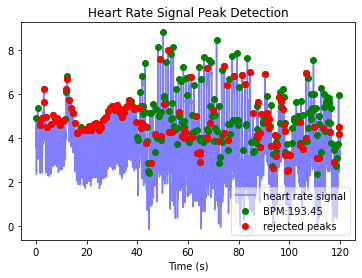

In [3]:
def load_visualise(data):
    data1 = hp.get_data(data)
    #run analysis
    wd, m = hp.process(data1, fs)
    #visualise in plot of custom size
    plt.figure(figsize=(12,4))
    hp.plotter(wd, m)
    #display computed measures
    for measure in m.keys():
        print('%s: %f' %(measure, m[measure]))
    return data1
data1 = load_visualise('118e06.csv')

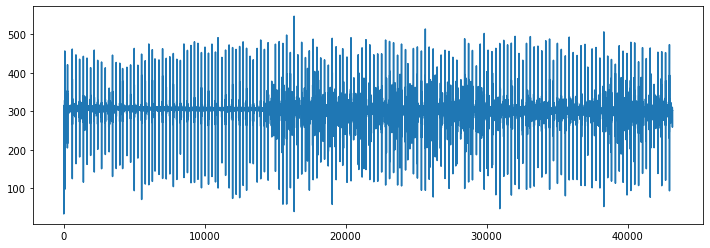

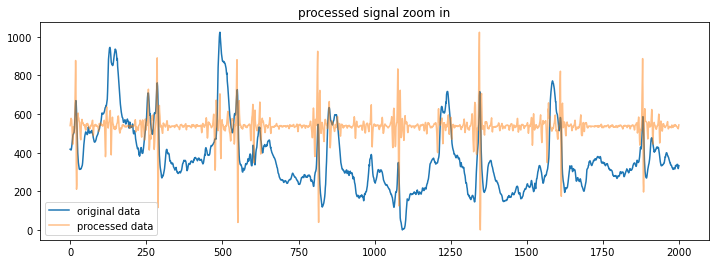

In [4]:
def filter_enhance(data1,fs):
    filtered = hp.enhance_ecg_peaks(hp.scale_data(data1), fs, 
                                aggregation='median', iterations=5)

    #show filtered signal
    plt.figure(figsize=(12,4))
    plt.plot(filtered)
    plt.show()

    #zoom in on signal section and overlay filtered segment 
    plt.figure(figsize=(12,4))
    plt.title('original signal zoom in')
    plt.plot(hp.scale_data(data1[15000:17000]), label='original data')
    plt.title('processed signal zoom in')
    plt.plot(hp.scale_data(filtered[15000:17000]), alpha=0.5, label='processed data')
    plt.legend()
    plt.show()
    return filtered
filtered = filter_enhance(data1,fs)

bpm: 81.500454
ibi: 736.192214
sdnn: 62.569284
sdsd: 74.268486
rmssd: 83.828045
pnn20: 0.296875
pnn50: 0.156250
hr_mad: 23.333333
sd1: 59.268926
sd2: 60.129353
s: 11196.014605
sd1/sd2: 0.985690
breathingrate: 0.266667


C:\Users\suprita_biswas\Anaconda3\envs\SSD\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

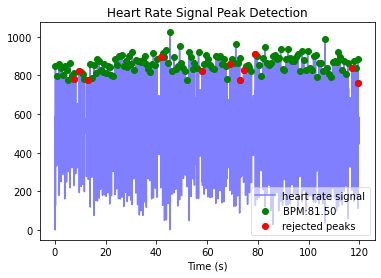

In [5]:
### Resample the filtered data
resampled_signal = resample(filtered, len(filtered) * 10)
filtered = hp.filter_signal(data1[0:14500], 0.05, fs, filtertype='notch')
wd, m = hp.process(hp.scale_data(resampled_signal), fs * 10)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

bpm: 85.851754
ibi: 698.879142
sdnn: 69.020852
sdsd: 89.444290
rmssd: 106.866468
pnn20: 0.446429
pnn50: 0.285714
hr_mad: 16.666667
sd1: 75.563652
sd2: 52.717686
s: 12514.662717
sd1/sd2: 1.433364
breathingrate: 0.166667


C:\Users\suprita_biswas\Anaconda3\envs\SSD\lib\site-packages\heartpy\visualizeutils.py:119: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 864x288 with 0 Axes>

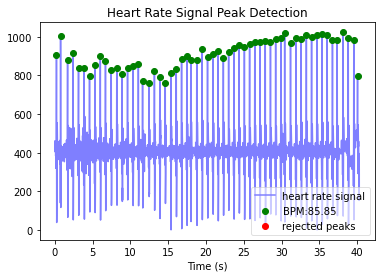

In [6]:
####scale the filtered data.
#data= hp.filter_signal(data,0.05,fs,filtertype="notch")
data = nk.ecg_clean(filtered,fs, method="neurokit")
wd, m = hp.process(hp.scale_data(data), fs)

plt.figure(figsize=(12,4))
hp.plotter(wd, m)

for measure in m.keys():
    print('%s: %f' %(measure, m[measure]))

In [8]:
peaklist = wd['peaklist']

In [9]:
RR_list = []
cnt = 0

while (cnt < (len(peaklist)-1)):
    interval = (peaklist[cnt+1] - peaklist[cnt]) #Calculate distance between beats in # of samples
    ms_dist = ((interval / fs) * 1000.0) #Convert sample distances to ms distances
    RR_list.append(ms_dist) #Append to list
    cnt += 1

RR_list
print("mean RR interval:", np.mean(RR_list))

mean RR interval: 698.8791423001949


In [10]:
bpm = 60000 / np.mean(RR_list) #60000 ms (1 minute) / average R-R interval of signal
print ("Average Heart Beat is: %.01f" %bpm) #Round off to 1 decimal and print

Average Heart Beat is: 85.9


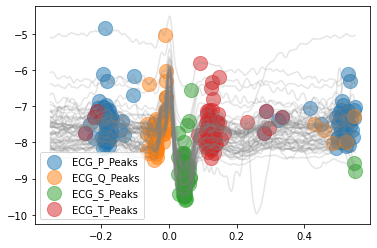

In [11]:
_, waves_peak = nk.ecg_delineate(data1, peaklist, fs, show=True, show_type='peaks')

In [12]:
ECGPpeaks = waves_peak['ECG_P_Peaks']
ECGQpeaks = waves_peak['ECG_Q_Peaks']
ECGSpeaks = waves_peak['ECG_S_Peaks']
ECGTpeaks = waves_peak['ECG_T_Peaks']

In [13]:
# finding out intervals
PR_list = []
cnt = 0
while (cnt < len(peaklist)):
    interval = peaklist[cnt] - ECGPpeaks[cnt]
    ms_dist = ((interval/fs) * 1000.0)
    PR_list.append(ms_dist)
    cnt += 1

In [14]:
PR_list
print("Mean of PR interval is :",np.nanmean(PR_list))

Mean of PR interval is : 182.23180076628353


In [16]:
QT_list=[]
cnt = 0
while (cnt < len(ECGTpeaks)):
    interval = ECGTpeaks[cnt] - ECGQpeaks[cnt]
    ms_dist = ((interval / fs) * 1000.0)
    QT_list.append(ms_dist)
    cnt += 1
QT_list
print("Mean of QT interval is :",np.nanmean(QT_list))

Mean of QT interval is : 170.25862068965517


In [17]:
QS_list = []
cnt = 0
while (cnt < len(ECGSpeaks)):
    interval = ECGSpeaks[cnt] - ECGQpeaks[cnt]
    ms_dist = ((interval / fs) * 1000.0)
    QS_list.append(ms_dist)
    cnt += 1
QS_list
print("Mean of QS interval is :",np.nanmean(QS_list))

Mean of QS interval is : 79.69348659003832


In [19]:
ST_list = []
cnt = 0
while (cnt < len(ECGTpeaks)):
    interval = ECGTpeaks[cnt] - ECGSpeaks[cnt]
    ms_dist = ((interval / fs) * 1000.0)
    ST_list.append(ms_dist)
    cnt += 1
ST_list
print("Mean of ST interval is :",np.nanmean(ST_list))

Mean of ST interval is : 90.56513409961687
